# Data Analysis for the paper 'Cultivating mindfulness in a software company: impact in performance and psico-cognitive factors'
## To be published at EMSE
### Analysis by José Antonio Parejo Maestre japarejo@us.es

## Libraries import

In [1]:
import pandas as pd
import plot_likert as pl
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import seaborn as sns
from tableone import TableOne
import pingouin as pg
import numpy as np
import math
from datetime import datetime,timedelta

## Important Constants

In [2]:
# Dates of the mindfulness workshop:
mindfulnessStartDate=datetime(2019, 2, 25)
mindfulnessEndDate=datetime(2019,4,4)

# Dates of the PRE-workshop measured performance interval
preStartDate=datetime(2019,2,1)
preEndDate=datetime(2019,2,22)

# Dates of the POST-workshop measured performance interval
postStartDate=datetime(2019,4,1)
postEndDate=datetime(2019,4,22)

## Data Import

In [3]:
print("Loading development tasks data:")
developmentTasks = pd.read_csv("data/subjectsData/DevelopmentTasks.csv",sep=";")
developmentTasks

Loading development tasks data:


,Sujeto,Perfil,Grupo,Identificador,Tareas,#,Proyecto,Tipo,Creado,Actualizado,Inicio,Fin,Cerrada
0,46,desarrollo,EXP,46 EXP desarrollo,AD1a,19358,SICAL,TC-Error,26/04/2019 9:23,NaN,NaN,NaN,NaN
1,46,desarrollo,EXP,46 EXP desarrollo,AD1a,19323,SICAL,TC-Error,23/04/2019 11:54,NaN,NaN,NaN,NaN
2,46,desarrollo,EXP,46 EXP desarrollo,AD1a,19169,SICAL,TC-Error,05/04/2019 8:30,NaN,NaN,NaN,NaN
3,46,desarrollo,EXP,46 EXP desarrollo,AD1a,19159,SICAL,TC-Error,04/04/2019 9:29,NaN,NaN,NaN,NaN
4,46,desarrollo,EXP,46 EXP desarrollo,AD1a,19131,SICAL,TC-Error,02/04/2019 8:09,NaN,,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,8,desarrollo,ctrl,8 ctrl desarrollo,BD1,19040,NaN,ErrorDetectado,22/03/2019 13:58,NaN,NaN,NaN,NaN
925,8,desarrollo,ctrl,8 ctrl desarrollo,BD1,19030,NaN,ErrorDetectado,22/03/2019 11:30,NaN,NaN,NaN,NaN
926,8,desarrollo,ctrl,8 ctrl desarrollo,BD1,19029,NaN,ErrorDetectado,22/03/2019 11:17,NaN,NaN,NaN,NaN
927,8,desarrollo,ctrl,8 ctrl desarrollo,BD1,19027,NaN,ErrorDetectado,22/03/2019 10:59,NaN,NaN,NaN,NaN


In [4]:
print("Loading support tasks data:")
supportTasks = pd.read_csv("data/subjectsData/SupportTasks.csv",sep=";")
supportTasks

Loading support tasks data:


,Sujeto,Perfil,Grupo,Identificador,ID,Título,Entidad,Estado,Última actualización,Fecha de apertura,...,Tiempo para resolver,Solicitante - Solicitante,Duración total,Descripción,Urgencia,Fecha de resolución,Fecha de cierre,Observador - Grupo de observación,Asignada a - Grupo técnico,Prioridad
0,9,Soporte,CTRL,9 CTRL Soporte,105 196,HACIENDA LOCAL,Entidad raíz > Ayuntamientos > Metropolitana >...,Resuelto,03/05/2019 11:37,03/05/2019 11:37,...,NaN,MUÑOZ AGUILAR YOLANDA,.5,CONSULTA HACIENDA LOCAL,Media,03/05/2019 11:37,NaN,CAU - Aplicaciones,Hacienda Local,Baja
1,9,Soporte,CTRL,9 CTRL Soporte,105 185,HACIENDA LOCAL,Entidad raíz > Ayuntamientos > Vega > Rinconad...,Resuelto,03/05/2019 9:43,03/05/2019 9:43,...,NaN,ESCUDERO BAÑEZ ANTONIO DANIEL,.5,CONSULTA HACIENDA LOCAL,Media,03/05/2019 9:43,NaN,CAU - Aplicaciones,Hacienda Local,Baja
2,9,Soporte,CTRL,9 CTRL Soporte,105 172,HACIENDA LOCAL,Entidad raíz > Ayuntamientos > Sierra Sur > Pe...,Resuelto,03/05/2019 8:38,03/05/2019 8:37,...,NaN,HUMANES MUÑOZ ANA,.5,CONSULTA HACIENDA LOCAL,Media,03/05/2019 8:38,NaN,CAU - Aplicaciones,Hacienda Local,Baja
3,9,Soporte,CTRL,9 CTRL Soporte,105 171,HACIENDA LOCAL,Entidad raíz > Ayuntamientos > Vega > Burguillos,Resuelto,03/05/2019 8:31,03/05/2019 8:30,...,NaN,SOLIS RAMIREZ EVA MARÍA,.5,CONSULTA HACIENDA LOCAL,Media,03/05/2019 8:31,NaN,CAU - Aplicaciones,Hacienda Local,Baja
4,9,Soporte,CTRL,9 CTRL Soporte,105 159,LICYTAL,Entidad raíz > Ayuntamientos > Campiña Morón >...,Resuelto,02/05/2019 14:03,02/05/2019 14:02,...,NaN,CRUZ ORTIZ ANTONIA,.5,CONSULTA LICYTAL,Media,02/05/2019 14:03,NaN,CAU - Aplicaciones,Licytal,Baja
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3276,29,Soporte,EXP,29 EXP Soporte,108 743,,,Resuelto,22/01/2019 9:01,21/01/2019 13:35,...,,,,,,,,,,Baja
3277,29,Soporte,EXP,29 EXP Soporte,108 740,,,Resuelto,22/01/2019 8:49,22/01/2019 8:40,...,,,,,,,,,,Baja
3278,29,Soporte,EXP,29 EXP Soporte,108 443,,,Resuelto,22/01/2019 8:40,22/01/2019 8:37,...,,,,,,,,,,Baja
3279,29,Soporte,EXP,29 EXP Soporte,108 735,,,Resuelto,22/01/2019 8:10,22/01/2019 8:07,...,,,,,,,,,,Baja


## Data Wrangling

### Develompment tasks

#### Renaming and date parsing

In [5]:
# Column renaming for translation from Spanish to English:
developmentTasks=developmentTasks.rename(columns={'Sujeto': 'ID',
                                          'Grupo': 'Group',
                                          'Creado':'Created',
                                          'Actualizado':'Updated',
                                          'Inicio':'Start',
                                          'Fin':'Finish',
                                          'Cerrada':'Closed',
                                          'Tipo':'Type',
                                          'Perfil':'Role'
                                          })
print(developmentTasks.columns)

def parseDate(row,column,formats):
    if type(row) != str:
        return row    
    #print(row)
    value=row
    for fmt in formats:
        try:
            value = datetime.strptime(row, fmt)
            break
        except ValueError:
            pass
        else:
            value = datetime.Na
    return value
    
        
formats=["%d/%m/%Y  %H:%M","%d/%m/%Y"]
# Conversion of columns to datetime:
developmentTasks['Created'] = developmentTasks['Created'].apply(lambda row: parseDate(row,'Created',formats))
developmentTasks['Updated'] = developmentTasks['Updated'].apply(lambda row: parseDate(row,'Updated',formats))
developmentTasks['Start'] = developmentTasks['Start'].apply(lambda row: parseDate(row,'Start',formats))
developmentTasks['Finish'] = developmentTasks['Finish'].apply(lambda row: parseDate(row,'Finish',formats))
developmentTasks['Closed'] = developmentTasks['Closed'].apply(lambda row: parseDate(row,'Closed',formats))

# Replacement of wrong Group specification (ctrl --> Ctrl)
developmentTasks['Group']=developmentTasks['Group'].replace('ctrl','Ctrl')
developmentTasks['Group']=developmentTasks['Group'].replace('CTRL','Ctrl')
developmentTasks

Index(['ID', 'Role', 'Group', 'Identificador', 'Tareas', '#', 'Proyecto',
       'Type', 'Created', 'Updated', 'Start', 'Finish', 'Closed'],
      dtype='object')


,ID,Role,Group,Identificador,Tareas,#,Proyecto,Type,Created,Updated,Start,Finish,Closed
0,46,desarrollo,EXP,46 EXP desarrollo,AD1a,19358,SICAL,TC-Error,2019-04-26 09:23:00,NaT,NaN,NaT,NaT
1,46,desarrollo,EXP,46 EXP desarrollo,AD1a,19323,SICAL,TC-Error,2019-04-23 11:54:00,NaT,NaN,NaT,NaT
2,46,desarrollo,EXP,46 EXP desarrollo,AD1a,19169,SICAL,TC-Error,2019-04-05 08:30:00,NaT,NaN,NaT,NaT
3,46,desarrollo,EXP,46 EXP desarrollo,AD1a,19159,SICAL,TC-Error,2019-04-04 09:29:00,NaT,NaN,NaT,NaT
4,46,desarrollo,EXP,46 EXP desarrollo,AD1a,19131,SICAL,TC-Error,2019-04-02 08:09:00,NaT,,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,8,desarrollo,Ctrl,8 ctrl desarrollo,BD1,19040,NaN,ErrorDetectado,2019-03-22 13:58:00,NaT,NaN,NaT,NaT
925,8,desarrollo,Ctrl,8 ctrl desarrollo,BD1,19030,NaN,ErrorDetectado,2019-03-22 11:30:00,NaT,NaN,NaT,NaT
926,8,desarrollo,Ctrl,8 ctrl desarrollo,BD1,19029,NaN,ErrorDetectado,2019-03-22 11:17:00,NaT,NaN,NaT,NaT
927,8,desarrollo,Ctrl,8 ctrl desarrollo,BD1,19027,NaN,ErrorDetectado,2019-03-22 10:59:00,NaT,NaN,NaT,NaT


### Computation of TTO and TTR 

In [6]:
def computeLeadTime(row):
    sdate=row['Start']    
    fdate=row['Closed']    
    if type(sdate)==float or type(fdate)==float or type(sdate)==str or type(fdate)==str:
        return np.NaN
    else:
        delta = fdate - sdate
        return delta.days/3600.0   

def computeTTO(row):
    sdate=row['Created']
    fdate=row['Start']
    if type(sdate)==float or type(fdate)==float or type(sdate)==str or type(fdate)==str:
        return np.NaN
    else:
        delta = fdate - sdate
        return delta.total_seconds()/3600.0

def computeTTR(row):
    cdate=row['Created']
    fdate=row['Closed']    
    delta = fdate - cdate
    return delta.total_seconds()/3600.0

developmentTasks['TTO']=developmentTasks.apply(lambda row: computeTTO(row),axis=1)
developmentTasks['TTR']=developmentTasks.apply(lambda row: computeTTR(row),axis=1)
developmentTasks['leadTime']=developmentTasks.apply(lambda row: computeLeadTime(row),axis=1)

### Support tasks

#### Renaming and date parsing

In [7]:
supportTasks=supportTasks.rename(columns={'Sujeto': 'ID',
                                          'Grupo': 'Group',
                                          'Identificador':'taskID',
                                          'ID':'task',
                                          'Fecha de apertura':'Created',
                                          'Última actualización':'Updated',
                                          'Fecha de resolución':'Finish',
                                          'Fecha de cierre':'Closed',
                                          'Estado':'State',
                                          'Perfil':'Role',
                                          'Categoría':'Type',
                                          'Duración total':'RTTC'
                                          })

print(supportTasks.columns)

def parseDate(row,formats):
    #print(type(row))
    if type(row) != str:
        return row    
    #print(row)
    value=row
    for fmt in formats:
        try:
            value = datetime.strptime(row, fmt)
            break
        except ValueError:
            pass
        else:
            value = datetime.Na
    return value

def parseTime(row,timeformats):    
    print(row)
    print(type(row))
    if type(row) == pd.Timestamp:
        row=datetime(row)
    elif type(row) != str:
        return row
    value=row
    for fmt in timeformats:
        try:
            t = datetime.strptime(value,fmt)
            delta = timedelta(hours=t.hour, minutes=t.minute, seconds=t.second)
            value = delta.total_seconds()/3600.0
        except ValueError:
            pass
        else:
            value = np.NaN
    return value


formats=["%d/%m/%Y  %H:%M","%d/%m/%Y"]

supportTasks['Created'] = supportTasks['Created'].apply(lambda row: parseDate(row,formats))
supportTasks['Updated'] = supportTasks['Updated'].apply(lambda row: parseDate(row,formats))
#supportTasks['Start'] = supportTasks['Start'].apply(lambda row: parseDate(row,'Created',formats))
supportTasks['Finish'] = supportTasks['Finish'].apply(lambda row: parseDate(row,formats))
supportTasks['Closed'] = supportTasks['Closed'].apply(lambda row: parseDate(row,formats))

#timeformats=["%H:%M","%HH:%MM"]
#supportTasks['RTTC'] = supportTasks['RTTC'].apply(lambda row: parseTime(row,timeformats))

# Replacement of wrong Group specification (ctrl --> Ctrl)
supportTasks['Group']=supportTasks['Group'].replace('ctrl','Ctrl')
supportTasks['Group']=supportTasks['Group'].replace('CTRL','Ctrl')

supportTasks['RTTC']

Index(['ID', 'Role', 'Group', 'taskID', 'task', 'Título', 'Entidad', 'State',
       'Updated', 'Created', 'Type', 'Tiempo para resolver',
       'Solicitante - Solicitante', 'RTTC', 'Descripción', 'Urgencia',
       'Finish', 'Closed', 'Observador - Grupo de observación',
       'Asignada a - Grupo técnico', 'Prioridad'],
      dtype='object')


0       .5
1       .5
2       .5
3       .5
4       .5
        ..
3276      
3277      
3278      
3279      
3280      
Name: RTTC, Length: 3281, dtype: object

### Aggregated metrics functions

Etc: Error tasks created


NFtc: New Functionality tasks created

Itc: Improvement tasks created

Stc: Support tasks created

Mtc: Management tasks created

----

Etu: Error tasks updated

NFtu: New Functionality tasks updated

Itu: Improvement tasks updated

Stu: Support tasks updated

Mtu: Management tasks updated

----

Eta: Error tasks assigned

NFta: New Functionality tasks assigned

Ita: Improvement tasks assigned

Sta: Support tasks assigned

Mta: Management tasks assigned

----

Etd: Error tasks done

NFtd: New Functionality tasks done

Itd: Improvement tasks done

Std: Support tasks done

Mtd: Management tasks done

----

Etcl: Error tasks closed

NFcl: New Functionality closed

Itcl: Improvement tasks closed

Stcl: Support tasks closed

Mtcl: Management tasks closed


In [8]:
def isTaskBetween(row,start,finish,action):    
    #print(str(row[action]))
    if type(row[action]) == float or type(row[action]) == str:
        return False
    return start <= row[action] <= finish

def isTaskTypeBetween(row,start,finish,tasktype,action):
    #print(row['Type'])
    return (row['Type'] == tasktype) and (isTaskBetween(row,start,finish,action))

def moment(row):
    if row['isEtclPre'] or row['isNFtclPre'] or row['isItclPre'] or row['isStclPre'] or row['isMtclPre']:
        return 'PRE'
    elif row['isEtclPost'] or row['isNFtclPost'] or row['isItclPost'] or row['isStclPost'] or row['isMtclPost']:
        return 'POST'
    else:
        return np.NaN                    
    
developmentTasks['isEtcPre']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,preStartDate,preEndDate,'TC-Error','Created'),axis=1)
developmentTasks['isEtcPost']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TC-Error','Created'),axis=1)
developmentTasks['isNFtcPre']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TC-Nueva Funcionalidad','Created'),axis=1) 
developmentTasks['isNFtcPost']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TC-Nueva Funcionalidad','Created'),axis=1) 
developmentTasks['isItcPre']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TC-Mejora','Created'),axis=1) 
developmentTasks['isItcPost']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TC-Mejora','Created'),axis=1)
developmentTasks['isStcPre'] =developmentTasks.apply(lambda row: isTaskTypeBetween(row,preStartDate,preEndDate,'TC-Soporte','Created'),axis=1)
developmentTasks['isStcPost']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TC-Soporte','Created'),axis=1)
developmentTasks['isMtcPre']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,preStartDate,preEndDate,'TC-Gestión','Created'),axis=1)
developmentTasks['isMtcPost']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TC-Gestión','Created'),axis=1)

                                                     
                                                     
developmentTasks['isEtuPre']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,preStartDate,preEndDate,'TA-Error','Updated'),axis=1)
developmentTasks['isEtuPost']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TA-Error','Updated'),axis=1)
developmentTasks['isNFtuPre']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TA-Nueva Funcionalidad','Updated'),axis=1) 
developmentTasks['isNFtuPost']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TA-Nueva Funcionalidad','Updated'),axis=1) 
developmentTasks['isItuPre']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TA-Mejora','Updated'),axis=1) 
developmentTasks['isItuPost']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TA-Mejora','Updated'),axis=1)
developmentTasks['isStuPre']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,preStartDate,preEndDate,'TA-Soporte','Updated'),axis=1)
developmentTasks['isStuPost']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TA-Soporte','Updated'),axis=1)
developmentTasks['isMtuPre']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,preStartDate,preEndDate,'TA-Gestión','Updated'),axis=1)
developmentTasks['isMtuPost']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TA-Gestión','Updated'),axis=1)
                                                     
developmentTasks['isEtaPre']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,preStartDate,preEndDate,'TAS-Error','Start'),axis=1)
developmentTasks['isEtaPost']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TAS-Error','Start'),axis=1)
developmentTasks['isNFtaPre']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TAS-Nueva Funcionalidad','Start'),axis=1) 
developmentTasks['isNFtaPost']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TAS-Nueva Funcionalidad','Start'),axis=1) 
developmentTasks['isItaPre']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TAS-Mejora','Start'),axis=1) 
developmentTasks['isItaPost']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TAS-Mejora','Start'),axis=1)
developmentTasks['isStaPre']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,preStartDate,preEndDate,'TAS-Soporte','Start'),axis=1)
developmentTasks['isStaPost']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TAS-Soporte','Start'),axis=1)
developmentTasks['isMtaPre']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,preStartDate,preEndDate,'TAS-Gestión','Start'),axis=1)
developmentTasks['isMtaPost']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TAS-Gestión','Start'),axis=1)

developmentTasks['isEtdPre']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,preStartDate,preEndDate,'TR-Error','Finish'),axis=1)
developmentTasks['isEtdPost']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TR-Error','Finish'),axis=1)
developmentTasks['isNFtdPre']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TR-Nueva Funcionalidad','Finish'),axis=1) 
developmentTasks['isNFtdPost']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TR-Nueva Funcionalidad','Finish'),axis=1) 
developmentTasks['isItdPre']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TR-Mejora','Finish'),axis=1) 
developmentTasks['isItdPost']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TR-Mejora','Finish'),axis=1)
developmentTasks['isStdPre']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,preStartDate,preEndDate,'TR-Soporte','Finish'),axis=1)
developmentTasks['isStdPost']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TR-Soporte','Finish'),axis=1)
developmentTasks['isMtdPre']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,preStartDate,preEndDate,'TR-Gestión','Finish'),axis=1)
developmentTasks['isMtdPost']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TR-Gestión','Finish'),axis=1)                                                                                                                                    

developmentTasks['isEtclPre']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,preStartDate,preEndDate,'TR-Error','Closed'),axis=1)
developmentTasks['isEtclPost']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TR-Error','Closed'),axis=1)
developmentTasks['isNFtclPre']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TR-Nueva Funcionalidad','Closed'),axis=1) 
developmentTasks['isNFtclPost']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TR-Nueva Funcionalidad','Closed'),axis=1) 
developmentTasks['isItclPre']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TR-Mejora','Closed'),axis=1) 
developmentTasks['isItclPost']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TR-Mejora','Closed'),axis=1)
developmentTasks['isStclPre']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,preStartDate,preEndDate,'TR-Soporte','Closed'),axis=1)
developmentTasks['isStclPost']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TR-Soporte','Closed'),axis=1)
developmentTasks['isMtclPre']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,preStartDate,preEndDate,'TR-Gestión','Closed'),axis=1)
developmentTasks['isMtclPost']=developmentTasks.apply(lambda row: isTaskTypeBetween(row,postStartDate,postEndDate,'TR-Gestión','Closed'),axis=1)                                                                                                                                    

developmentTasks['MOMENT']=developmentTasks.apply(lambda row: moment(row),axis=1)

developmentTasks

,ID,Role,Group,Identificador,Tareas,#,Proyecto,Type,Created,Updated,...,isEtclPost,isNFtclPre,isNFtclPost,isItclPre,isItclPost,isStclPre,isStclPost,isMtclPre,isMtclPost,MOMENT
0,46,desarrollo,EXP,46 EXP desarrollo,AD1a,19358,SICAL,TC-Error,2019-04-26 09:23:00,NaT,...,False,False,False,False,False,False,False,False,False,NaN
1,46,desarrollo,EXP,46 EXP desarrollo,AD1a,19323,SICAL,TC-Error,2019-04-23 11:54:00,NaT,...,False,False,False,False,False,False,False,False,False,NaN
2,46,desarrollo,EXP,46 EXP desarrollo,AD1a,19169,SICAL,TC-Error,2019-04-05 08:30:00,NaT,...,False,False,False,False,False,False,False,False,False,NaN
3,46,desarrollo,EXP,46 EXP desarrollo,AD1a,19159,SICAL,TC-Error,2019-04-04 09:29:00,NaT,...,False,False,False,False,False,False,False,False,False,NaN
4,46,desarrollo,EXP,46 EXP desarrollo,AD1a,19131,SICAL,TC-Error,2019-04-02 08:09:00,NaT,...,False,False,False,False,False,False,False,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,8,desarrollo,Ctrl,8 ctrl desarrollo,BD1,19040,NaN,ErrorDetectado,2019-03-22 13:58:00,NaT,...,False,False,False,False,False,False,False,False,False,NaN
925,8,desarrollo,Ctrl,8 ctrl desarrollo,BD1,19030,NaN,ErrorDetectado,2019-03-22 11:30:00,NaT,...,False,False,False,False,False,False,False,False,False,NaN
926,8,desarrollo,Ctrl,8 ctrl desarrollo,BD1,19029,NaN,ErrorDetectado,2019-03-22 11:17:00,NaT,...,False,False,False,False,False,False,False,False,False,NaN
927,8,desarrollo,Ctrl,8 ctrl desarrollo,BD1,19027,NaN,ErrorDetectado,2019-03-22 10:59:00,NaT,...,False,False,False,False,False,False,False,False,False,NaN


## Aggregated Metrics Computation

### Development Tasks

In [9]:
columns=['isEtcPre','isEtcPost','isNFtcPre','isNFtcPost','isItcPre','isItcPost','isStcPre','isStcPost','isMtcPre','isMtcPost',
         'isEtuPre','isEtuPost','isNFtuPre','isNFtuPost','isItuPre','isItuPost','isStuPre','isStuPost','isMtuPre','isMtuPost',
         'isEtaPre','isEtaPost','isNFtaPre','isNFtaPost','isItaPre','isItaPost','isStaPre','isStaPost','isMtaPre','isMtaPost',
         'isEtdPre','isEtdPost','isNFtdPre','isNFtdPost','isItdPre','isItdPost','isStdPre','isStdPost','isMtdPre','isMtdPost',
         'isEtclPre','isEtclPost','isNFtclPre','isNFtclPost','isItclPre','isItclPost','isStclPre','isStclPost','isMtclPre','isMtclPost']
aggregatedDevelopmentTasks=developmentTasks.groupby(['ID', 'Group'])[columns].apply(lambda x : x.astype(int).sum())
aggregatedDevelopmentTasks['CreatedTasksPre']=aggregatedDevelopmentTasks.apply(lambda row: row['isEtcPre']+row['isNFtcPre']+row['isItcPre']+row['isStcPre']+row['isMtcPre'],axis=1)
aggregatedDevelopmentTasks['CreatedTasksPost']=aggregatedDevelopmentTasks.apply(lambda row: row['isEtcPost']+row['isNFtcPost']+row['isItcPost']+row['isStcPost']+row['isMtcPost'],axis=1)
aggregatedDevelopmentTasks['UpdatedTasksPre']=aggregatedDevelopmentTasks.apply(lambda row: row['isEtuPre']+row['isNFtuPre']+row['isItuPre']+row['isStuPre']+row['isMtuPre'],axis=1)
aggregatedDevelopmentTasks['UpdatedTasksPost']=aggregatedDevelopmentTasks.apply(lambda row: row['isEtuPost']+row['isNFtuPost']+row['isItuPost']+row['isStuPost']+row['isMtuPost'],axis=1)
aggregatedDevelopmentTasks['AssignedTasksPre']=aggregatedDevelopmentTasks.apply(lambda row: row['isEtaPre']+row['isNFtaPre']+row['isItaPre']+row['isStaPre']+row['isMtaPre'],axis=1)
aggregatedDevelopmentTasks['AssignedTasksPost']=aggregatedDevelopmentTasks.apply(lambda row: row['isEtaPost']+row['isNFtaPost']+row['isItaPost']+row['isStaPost']+row['isMtaPost'],axis=1)
aggregatedDevelopmentTasks['DoneTasksPre']=aggregatedDevelopmentTasks.apply(lambda row: row['isEtdPre']+row['isNFtdPre']+row['isItdPre']+row['isStdPre']+row['isMtdPre'],axis=1)
aggregatedDevelopmentTasks['DoneTasksPost']=aggregatedDevelopmentTasks.apply(lambda row: row['isEtdPost']+row['isNFtdPost']+row['isItdPost']+row['isStdPost']+row['isMtdPost'],axis=1)
aggregatedDevelopmentTasks['ClosedTasksPre']=aggregatedDevelopmentTasks.apply(lambda row: row['isEtclPre']+row['isNFtclPre']+row['isItclPre']+row['isStclPre']+row['isMtclPre'],axis=1)
aggregatedDevelopmentTasks['ClosedTasksPost']=aggregatedDevelopmentTasks.apply(lambda row: row['isEtclPost']+row['isNFtclPost']+row['isItclPost']+row['isStclPost']+row['isMtclPost'],axis=1)

aggregatedDevelopmentTasks['TasksPre']=aggregatedDevelopmentTasks.apply(lambda row: row['CreatedTasksPre']+row['UpdatedTasksPre']+row['AssignedTasksPre']+row['DoneTasksPre']+row['ClosedTasksPre'],axis=1)
aggregatedDevelopmentTasks['TasksPost']=aggregatedDevelopmentTasks.apply(lambda row: row['CreatedTasksPost']+row['UpdatedTasksPost']+row['AssignedTasksPost']+row['DoneTasksPost']+row['ClosedTasksPost'],axis=1)

aggregatedDevelopmentTasks

,,isEtcPre,isEtcPost,isNFtcPre,isNFtcPost,isItcPre,isItcPost,isStcPre,isStcPost,isMtcPre,isMtcPost,...,UpdatedTasksPre,UpdatedTasksPost,AssignedTasksPre,AssignedTasksPost,DoneTasksPre,DoneTasksPost,ClosedTasksPre,ClosedTasksPost,TasksPre,TasksPost
ID,Group,,,,,,,,,,,,,,,,,,,,,
8,Ctrl,0,5,2,2,1,1,0,0,0,0,...,1,10,0,0,0,0,0,0,4,18
16,EXP,0,0,0,0,0,0,0,0,21,11,...,26,7,0,0,0,0,0,0,47,18
25,Ctrl,1,0,2,2,0,0,0,0,0,0,...,6,3,0,0,0,0,0,1,9,6
26,Ctrl,0,0,0,0,0,0,0,0,0,0,...,2,4,0,0,0,0,2,6,4,10
28,Ctrl,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
32,EXP,3,0,0,0,1,1,1,0,2,3,...,4,2,0,0,0,0,3,0,14,6
46,EXP,5,3,0,0,0,0,0,0,0,0,...,6,3,0,0,0,0,2,4,13,10


In [36]:
aggregatedDevelopmentTasks.reset_index(inplace=True)
df=aggregatedDevelopmentTasks[['Group','ID','TasksPre','TasksPost']]
df

,Group,ID,TasksPre,TasksPost
0,Ctrl,8,4,18
1,EXP,16,47,18
2,Ctrl,25,9,6
3,Ctrl,26,4,10
4,Ctrl,28,0,2
5,EXP,32,14,6
6,EXP,46,13,10


Development Tasks


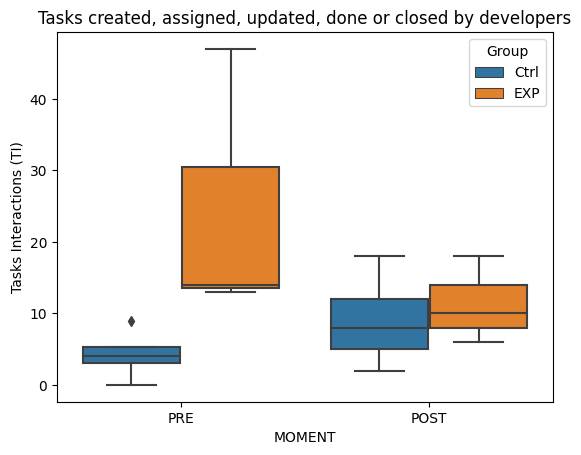

,ID,Group,MOMENT,TASKS
0,8,Ctrl,PRE,4
1,16,EXP,PRE,47
2,25,Ctrl,PRE,9
3,26,Ctrl,PRE,4
4,28,Ctrl,PRE,0
5,32,EXP,PRE,14
6,46,EXP,PRE,13
7,8,Ctrl,POST,18
8,16,EXP,POST,18
9,25,Ctrl,POST,6


In [40]:
longADT=pd.melt(df,id_vars=['ID','Group'],value_vars=['TasksPre','TasksPost'])
longADT=longADT.rename(columns={"variable": "MOMENT", "value": "TASKS"})
longADT['MOMENT']=longADT['MOMENT'].replace('TasksPre','PRE')
longADT['MOMENT']=longADT['MOMENT'].replace('TasksPost','POST')
print('Development Tasks')
plot=sns.boxplot(data=longADT, x='MOMENT',y='TASKS',hue='Group')
figureFileName = 'figures/developmentTasks-boxplot.png'
plot.set(ylabel='Tasks Interactions (TI)')
plt.savefig(figureFileName,bbox_inches='tight',dpi=300)
plot.set(title='Tasks created, assigned, updated, done or closed by developers')
plt.show(plot)
longADT

Development Tasks done


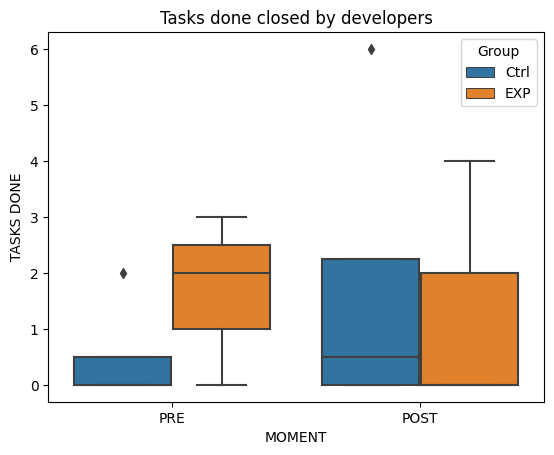

,ID,Group,MOMENT,TASKS DONE
0,8,Ctrl,PRE,0
1,16,EXP,PRE,0
2,25,Ctrl,PRE,0
3,26,Ctrl,PRE,2
4,28,Ctrl,PRE,0
5,32,EXP,PRE,3
6,46,EXP,PRE,2
7,8,Ctrl,POST,0
8,16,EXP,POST,0
9,25,Ctrl,POST,1


In [32]:
df=aggregatedDevelopmentTasks[['Group','ID','ClosedTasksPre','ClosedTasksPost']]
longADTDone=pd.melt(df,id_vars=['ID','Group'],value_vars=['ClosedTasksPre','ClosedTasksPost'])
longADTDone=longADTDone.rename(columns={"variable": "MOMENT", "value": "TASKS DONE"})
longADTDone['MOMENT']=longADTDone['MOMENT'].replace('ClosedTasksPre','PRE')
longADTDone['MOMENT']=longADTDone['MOMENT'].replace('ClosedTasksPost','POST')
print('Development Tasks done')
plot=sns.boxplot(data=longADTDone, x='MOMENT',y='TASKS DONE',hue='Group')
plot.set(title='Tasks done closed by developers')
figureFileName = 'figures/developmentTasks-Done-boxplot.png'
plt.savefig(figureFileName,bbox_inches='tight',dpi=300)
plt.show()
longADTDone

### TTO

,ID,Group,TTO,Created,Start
75,46,EXP,-12.366667,2019-04-10 12:22:00,2019-04-10 00:00:00
76,46,EXP,-8.500000,2019-04-05 08:30:00,2019-04-05 00:00:00
77,46,EXP,-9.483333,2019-04-04 09:29:00,2019-04-04 00:00:00
78,46,EXP,-8.150000,2019-04-02 08:09:00,2019-04-02 00:00:00
636,25,Ctrl,-11.733333,2019-04-12 11:44:00,2019-04-12 00:00:00
803,26,Ctrl,-9.583333,2019-04-05 09:35:00,2019-04-05 00:00:00
804,26,Ctrl,-11.650000,2019-04-01 11:39:00,2019-04-01 00:00:00
805,26,Ctrl,-10.100000,2019-04-01 10:06:00,2019-04-01 00:00:00
837,26,Ctrl,-12.983333,2019-01-29 12:59:00,2019-01-29 00:00:00
849,26,Ctrl,-13.516667,2018-12-18 13:31:00,2018-12-18 00:00:00


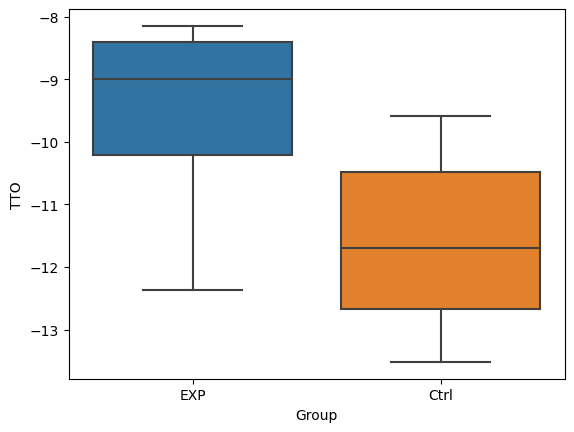

In [13]:
developmentTasksPost=developmentTasks.loc[developmentTasks['MOMENT']=='POST']
sns.boxplot(data=developmentTasksPost[['Group','TTO']], x='Group',y='TTO')
developmentTasksPost[['ID','Group','TTO','Created','Start']]

TTR

,ID,Group,TTR,Created,Finish,Closed
75,46,EXP,2.066667,2019-04-10 12:22:00,NaT,2019-04-10 14:26:00
76,46,EXP,0.000000,2019-04-05 08:30:00,NaT,2019-04-05 08:30:00
77,46,EXP,0.000000,2019-04-04 09:29:00,NaT,2019-04-04 09:29:00
78,46,EXP,0.000000,2019-04-02 08:09:00,NaT,2019-04-02 08:09:00
636,25,Ctrl,1.150000,2019-04-12 11:44:00,NaT,2019-04-12 12:53:00
803,26,Ctrl,119.100000,2019-04-05 09:35:00,NaT,2019-04-10 08:41:00
804,26,Ctrl,23.783333,2019-04-01 11:39:00,NaT,2019-04-02 11:26:00
805,26,Ctrl,25.316667,2019-04-01 10:06:00,NaT,2019-04-02 11:25:00
837,26,Ctrl,1484.066667,2019-01-29 12:59:00,NaT,2019-04-01 09:03:00
849,26,Ctrl,2518.866667,2018-12-18 13:31:00,NaT,2019-04-02 12:23:00


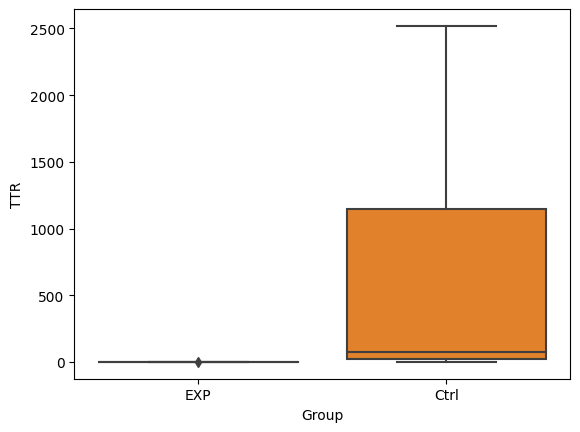

In [14]:
sns.boxplot(data=developmentTasksPost[['Group','TTR']], x='Group',y='TTR')
developmentTasksPost[['ID','Group','TTR','Created','Finish','Closed']]

### Lead Time

,ID,Group,TTR,Start,Finish,Closed
75,46,EXP,2.066667,2019-04-10 00:00:00,NaT,2019-04-10 14:26:00
76,46,EXP,0.000000,2019-04-05 00:00:00,NaT,2019-04-05 08:30:00
77,46,EXP,0.000000,2019-04-04 00:00:00,NaT,2019-04-04 09:29:00
78,46,EXP,0.000000,2019-04-02 00:00:00,NaT,2019-04-02 08:09:00
636,25,Ctrl,1.150000,2019-04-12 00:00:00,NaT,2019-04-12 12:53:00
803,26,Ctrl,119.100000,2019-04-05 00:00:00,NaT,2019-04-10 08:41:00
804,26,Ctrl,23.783333,2019-04-01 00:00:00,NaT,2019-04-02 11:26:00
805,26,Ctrl,25.316667,2019-04-01 00:00:00,NaT,2019-04-02 11:25:00
837,26,Ctrl,1484.066667,2019-01-29 00:00:00,NaT,2019-04-01 09:03:00
849,26,Ctrl,2518.866667,2018-12-18 00:00:00,NaT,2019-04-02 12:23:00


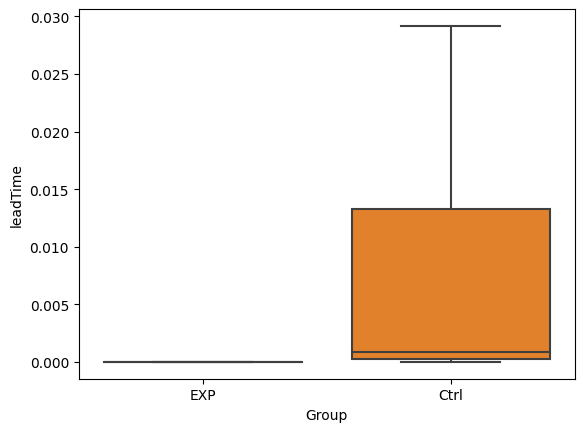

In [15]:
sns.boxplot(data=developmentTasksPost, x='Group',y='leadTime')
developmentTasksPost[['ID','Group','TTR','Start','Finish','Closed']]

### Support Tasks

In [16]:
supportTasks['isCreatedPre']=supportTasks.apply(lambda row: isTaskBetween(row,preStartDate,preEndDate,'Created'),axis=1)
supportTasks['isUpdatedPre']=supportTasks.apply(lambda row: isTaskBetween(row,preStartDate,preEndDate,'Updated'),axis=1)
supportTasks['isFinishedPre']=supportTasks.apply(lambda row: isTaskBetween(row,preStartDate,preEndDate,'Finish'),axis=1)
supportTasks['isClosedPre']=supportTasks.apply(lambda row: isTaskBetween(row,preStartDate,preEndDate,'Updated'),axis=1)

supportTasks['isCreatedPost']=supportTasks.apply(lambda row: isTaskBetween(row,postStartDate,postEndDate,'Created'),axis=1)
supportTasks['isUpdatedPost']=supportTasks.apply(lambda row: isTaskBetween(row,postStartDate,postEndDate,'Updated'),axis=1)
supportTasks['isFinishedPost']=supportTasks.apply(lambda row: isTaskBetween(row,postStartDate,postEndDate,'Finish'),axis=1)
supportTasks['isClosedPost']=supportTasks.apply(lambda row: isTaskBetween(row,postStartDate,postEndDate,'Updated'),axis=1)

def computeMomentSupport(row):
    if row['isClosedPost']:
        return 'POST'
    elif row['isClosedPre']:
        return 'PRE'
    else:
        return np.NaN

supportTasks['MOMENT']=supportTasks.apply(lambda row: computeMomentSupport(row),axis=1)
supportTasks

,ID,Role,Group,taskID,task,Título,Entidad,State,Updated,Created,...,Prioridad,isCreatedPre,isUpdatedPre,isFinishedPre,isClosedPre,isCreatedPost,isUpdatedPost,isFinishedPost,isClosedPost,MOMENT
0,9,Soporte,Ctrl,9 CTRL Soporte,105 196,HACIENDA LOCAL,Entidad raíz > Ayuntamientos > Metropolitana >...,Resuelto,2019-05-03 11:37:00,2019-05-03 11:37:00,...,Baja,False,False,False,False,False,False,False,False,NaN
1,9,Soporte,Ctrl,9 CTRL Soporte,105 185,HACIENDA LOCAL,Entidad raíz > Ayuntamientos > Vega > Rinconad...,Resuelto,2019-05-03 09:43:00,2019-05-03 09:43:00,...,Baja,False,False,False,False,False,False,False,False,NaN
2,9,Soporte,Ctrl,9 CTRL Soporte,105 172,HACIENDA LOCAL,Entidad raíz > Ayuntamientos > Sierra Sur > Pe...,Resuelto,2019-05-03 08:38:00,2019-05-03 08:37:00,...,Baja,False,False,False,False,False,False,False,False,NaN
3,9,Soporte,Ctrl,9 CTRL Soporte,105 171,HACIENDA LOCAL,Entidad raíz > Ayuntamientos > Vega > Burguillos,Resuelto,2019-05-03 08:31:00,2019-05-03 08:30:00,...,Baja,False,False,False,False,False,False,False,False,NaN
4,9,Soporte,Ctrl,9 CTRL Soporte,105 159,LICYTAL,Entidad raíz > Ayuntamientos > Campiña Morón >...,Resuelto,2019-05-02 14:03:00,2019-05-02 14:02:00,...,Baja,False,False,False,False,False,False,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3276,29,Soporte,EXP,29 EXP Soporte,108 743,,,Resuelto,2019-01-22 09:01:00,2019-01-21 13:35:00,...,Baja,False,False,False,False,False,False,False,False,NaN
3277,29,Soporte,EXP,29 EXP Soporte,108 740,,,Resuelto,2019-01-22 08:49:00,2019-01-22 08:40:00,...,Baja,False,False,False,False,False,False,False,False,NaN
3278,29,Soporte,EXP,29 EXP Soporte,108 443,,,Resuelto,2019-01-22 08:40:00,2019-01-22 08:37:00,...,Baja,False,False,False,False,False,False,False,False,NaN
3279,29,Soporte,EXP,29 EXP Soporte,108 735,,,Resuelto,2019-01-22 08:10:00,2019-01-22 08:07:00,...,Baja,False,False,False,False,False,False,False,False,NaN


### Computation of TTR for support tasks:

In [17]:
def computeSupportTTR(row):
    cdate=row['Created']
    fdate=row['Finish']    
    if type(cdate)==float or type(fdate)==float or type(cdate)==str or type(fdate)==str:
        return np.NaN
    else:
        delta = fdate - cdate
        return delta.total_seconds()/3600.0   


supportTasks['TTR']=supportTasks.apply(lambda row: computeSupportTTR(row),axis=1)
supportTasks

,ID,Role,Group,taskID,task,Título,Entidad,State,Updated,Created,...,isCreatedPre,isUpdatedPre,isFinishedPre,isClosedPre,isCreatedPost,isUpdatedPost,isFinishedPost,isClosedPost,MOMENT,TTR
0,9,Soporte,Ctrl,9 CTRL Soporte,105 196,HACIENDA LOCAL,Entidad raíz > Ayuntamientos > Metropolitana >...,Resuelto,2019-05-03 11:37:00,2019-05-03 11:37:00,...,False,False,False,False,False,False,False,False,NaN,0.000000
1,9,Soporte,Ctrl,9 CTRL Soporte,105 185,HACIENDA LOCAL,Entidad raíz > Ayuntamientos > Vega > Rinconad...,Resuelto,2019-05-03 09:43:00,2019-05-03 09:43:00,...,False,False,False,False,False,False,False,False,NaN,0.000000
2,9,Soporte,Ctrl,9 CTRL Soporte,105 172,HACIENDA LOCAL,Entidad raíz > Ayuntamientos > Sierra Sur > Pe...,Resuelto,2019-05-03 08:38:00,2019-05-03 08:37:00,...,False,False,False,False,False,False,False,False,NaN,0.016667
3,9,Soporte,Ctrl,9 CTRL Soporte,105 171,HACIENDA LOCAL,Entidad raíz > Ayuntamientos > Vega > Burguillos,Resuelto,2019-05-03 08:31:00,2019-05-03 08:30:00,...,False,False,False,False,False,False,False,False,NaN,0.016667
4,9,Soporte,Ctrl,9 CTRL Soporte,105 159,LICYTAL,Entidad raíz > Ayuntamientos > Campiña Morón >...,Resuelto,2019-05-02 14:03:00,2019-05-02 14:02:00,...,False,False,False,False,False,False,False,False,NaN,0.016667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3276,29,Soporte,EXP,29 EXP Soporte,108 743,,,Resuelto,2019-01-22 09:01:00,2019-01-21 13:35:00,...,False,False,False,False,False,False,False,False,NaN,NaN
3277,29,Soporte,EXP,29 EXP Soporte,108 740,,,Resuelto,2019-01-22 08:49:00,2019-01-22 08:40:00,...,False,False,False,False,False,False,False,False,NaN,NaN
3278,29,Soporte,EXP,29 EXP Soporte,108 443,,,Resuelto,2019-01-22 08:40:00,2019-01-22 08:37:00,...,False,False,False,False,False,False,False,False,NaN,NaN
3279,29,Soporte,EXP,29 EXP Soporte,108 735,,,Resuelto,2019-01-22 08:10:00,2019-01-22 08:07:00,...,False,False,False,False,False,False,False,False,NaN,NaN


In [18]:
columns=['isCreatedPre','isUpdatedPre','isFinishedPre','isClosedPre','isCreatedPost','isUpdatedPost','isFinishedPost','isClosedPost']
aggregatedSupportTasks=supportTasks.groupby(['ID', 'Group'])[columns].apply(lambda x : x.astype(int).sum())
aggregatedSupportTasks['TasksPre']=aggregatedSupportTasks.apply(lambda row: row['isCreatedPre']+row['isUpdatedPre']+row['isFinishedPre']+row['isClosedPre'],axis=1)
aggregatedSupportTasks['TasksPost']=aggregatedSupportTasks.apply(lambda row: row['isCreatedPost']+row['isUpdatedPost']+row['isFinishedPost']+row['isClosedPost'],axis=1)

aggregatedSupportTasks

,,isCreatedPre,isUpdatedPre,isFinishedPre,isClosedPre,isCreatedPost,isUpdatedPost,isFinishedPost,isClosedPost,TasksPre,TasksPost
ID,Group,,,,,,,,,,
9,Ctrl,70,69,69,69,2,2,2,2,277,8
10,EXP,67,65,65,65,42,39,39,39,262,159
12,Ctrl,93,11,11,11,50,85,85,85,126,305
18,Ctrl,109,92,103,92,73,71,71,71,396,286
29,EXP,214,199,0,199,155,158,0,158,612,471
33,Ctrl,60,50,50,50,30,28,28,28,210,114
36,EXP,117,93,113,93,48,59,50,59,416,216
44,EXP,72,52,52,52,47,43,43,43,228,176


Support Tasks


<Axes: title={'center': 'Tasks created, assigned, updated, done or closed by the support team'}, xlabel='MOMENT', ylabel='Task Interactions (TI)'>

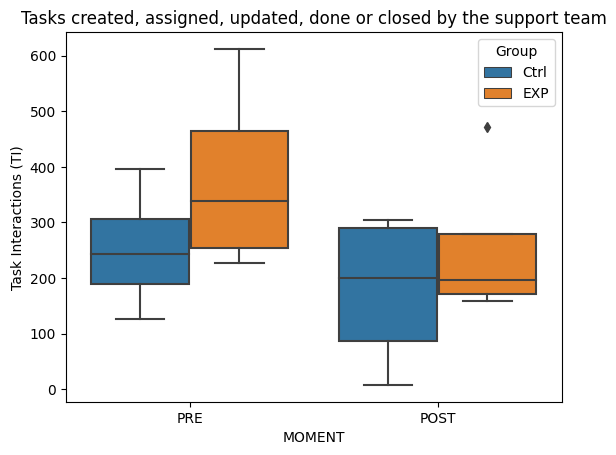

In [41]:
aggregatedSupportTasks.reset_index(inplace=True)
longAST=pd.melt(aggregatedSupportTasks,id_vars=['ID','Group'],value_vars=['TasksPre','TasksPost'])
longAST=longAST.rename(columns={"variable": "MOMENT", "value": "TASKS"})
longAST['MOMENT']=longAST['MOMENT'].replace('TasksPre','PRE')
longAST['MOMENT']=longAST['MOMENT'].replace('TasksPost','POST')
print('Support Tasks')
plot=sns.boxplot(data=longAST, x='MOMENT',y='TASKS',hue='Group')
plot.set(ylabel="Task Interactions (TI)")
figureFileName = 'figures/suportTasks-boxplot.png'
plt.savefig(figureFileName,bbox_inches='tight',dpi=300)
plot.set(title='Tasks created, assigned, updated, done or closed by the support team')

plot

    ID Group MOMENT  TASKS DONE
0    9  Ctrl    PRE          69
1   10   EXP    PRE          65
2   12  Ctrl    PRE          11
3   18  Ctrl    PRE         103
4   29   EXP    PRE           0
5   33  Ctrl    PRE          50
6   36   EXP    PRE         113
7   44   EXP    PRE          52
8    9  Ctrl   POST           2
9   10   EXP   POST          39
10  12  Ctrl   POST          85
11  18  Ctrl   POST          71
12  29   EXP   POST           0
13  33  Ctrl   POST          28
14  36   EXP   POST          50
15  44   EXP   POST          43
Support Tasks


<Axes: title={'center': 'Tasks done or closed by the support team'}, xlabel='MOMENT', ylabel='TASKS DONE'>

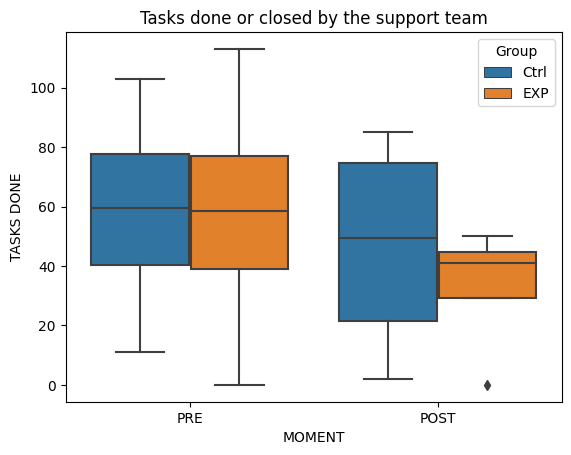

In [20]:
longASTDone=pd.melt(aggregatedSupportTasks,id_vars=['ID','Group'],value_vars=['isFinishedPre','isFinishedPost'])
longASTDone=longASTDone.rename(columns={"variable": "MOMENT", "value": "TASKS DONE"})
longASTDone['MOMENT']=longASTDone['MOMENT'].replace('isFinishedPre','PRE')
longASTDone['MOMENT']=longASTDone['MOMENT'].replace('isFinishedPost','POST')
print(longASTDone)
print('Support Tasks')
plot=sns.boxplot(data=longASTDone, x='MOMENT',y='TASKS DONE',hue='Group')
plot.set(title='Tasks done or closed by the support team')
figureFileName = 'figures/suportTasks-Done-boxplot.png'
plt.savefig(figureFileName,bbox_inches='tight',dpi=300)
plot

## Null Hypothesis Statstical tests

### Development tasks

In [21]:
anovaTable=pg.mixed_anova(dv='TASKS', between='Group', within='MOMENT', subject='ID', data=longADT[['TASKS', 'Group', 'MOMENT', 'ID']].dropna())
print("ANOVA Mixed for development tasks (created, assigned, updagted,finished, and closed):")
anovaTable

ANOVA Mixed for development tasks (created, assigned, updagted,finished, and closed):


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Group,443.625000,1,5,443.625000,3.012222,0.143159,0.375953,NaN
1,MOMENT,31.500000,1,5,31.500000,0.588327,0.477702,0.105278,1.0
2,Interaction,280.291667,1,5,280.291667,5.235019,0.070825,0.511481,NaN


In [22]:
anovaTable=pg.mixed_anova(dv='TASKS DONE', between='Group', within='MOMENT', subject='ID', data=longADTDone[['TASKS DONE','Group', 'MOMENT','ID']].dropna())
print("ANOVA Mixed for development tasks done:")
anovaTable

ANOVA Mixed for development tasks done:


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Group,0.482143,1,5,0.482143,0.076836,0.792727,0.015135,NaN
1,MOMENT,1.142857,1,5,1.142857,0.488053,0.515948,0.088930,1.0
2,Interaction,2.148810,1,5,2.148810,0.917641,0.382089,0.155069,NaN


In [23]:
anovaTable=pg.mixed_anova(dv='TTO', between='Group', within='MOMENT', subject='ID', data=developmentTasks[['TTO','Group','MOMENT','ID']].dropna())
print("ANOVA Mixed for TTO:")
anovaTable

ANOVA Mixed for TTO:


C:\Users\japarejo\anaconda3\envs\Inpro-Analysis\lib\site-packages\pingouin\parametric.py:1534: RuntimeWarning: invalid value encountered in scalar divide
  ms_resbetw = ss_resbetw / df_resbetw
C:\Users\japarejo\anaconda3\envs\Inpro-Analysis\lib\site-packages\pingouin\parametric.py:1535: RuntimeWarning: invalid value encountered in scalar divide
  ms_reswith = ss_reswith / df_reswith


,Source,SS,DF1,DF2,MS,np2,eps
0,Group,5.880625,1,0,5.880625,1.0,NaN
1,MOMENT,4.515625,1,0,4.515625,1.0,1.0
2,Interaction,0.233611,1,0,0.233611,1.0,NaN


In [24]:
anovaTable=pg.anova(dv='TTR', between='Group',  data=developmentTasks[['TTR','Group','MOMENT','ID']].dropna())
print("ANOVA Mixed for TTR:")
anovaTable

ANOVA Mixed for TTR:


,Source,ddof1,ddof2,F,p-unc,np2
0,Group,1,15,0.3567,0.559253,0.023228


In [25]:
anovaTable=pg.mixed_anova(dv='leadTime', between='Group', within='MOMENT', subject='ID', data=developmentTasks[['leadTime','Group','MOMENT','ID']].dropna())
print("ANOVA Mixed for leadTime:")
anovaTable

ANOVA Mixed for leadTime:


C:\Users\japarejo\anaconda3\envs\Inpro-Analysis\lib\site-packages\pingouin\parametric.py:1534: RuntimeWarning: invalid value encountered in scalar divide
  ms_resbetw = ss_resbetw / df_resbetw
C:\Users\japarejo\anaconda3\envs\Inpro-Analysis\lib\site-packages\pingouin\parametric.py:1535: RuntimeWarning: divide by zero encountered in scalar divide
  ms_reswith = ss_reswith / df_reswith


,Source,SS,DF1,DF2,MS,F,np2,eps
0,Group,0.000033,1,0,0.000033,NaN,1.0,NaN
1,MOMENT,0.000014,1,0,0.000014,0.0,1.0,1.0
2,Interaction,0.000015,1,0,0.000015,0.0,1.0,NaN


### Support tasks

In [42]:
anovaTable=pg.mixed_anova(dv='TASKS', between='Group', within='MOMENT', subject='ID', data=longAST[['TASKS','Group','MOMENT','ID']].dropna())
print("Anova mixed for tasks created, assigned, updated, and finished by the support team")
text_file = open("latex/MixedModelAnovaTasksInteractionsSupport.tex", "wt")
n = text_file.write(anovaTable.style.to_latex(
                        #column_format="rrrrr", 
                        position="h", position_float="centering",
                        hrules=True, label="tab:ANOVAMixedModelTasksSupport", caption="Mixed model ANOVA table for Tasks Interactions on the support department",
                        multirow_align="t", multicol_align="r"
                    ))
text_file.close()
anovaTable

Anova mixed for tasks created, assigned, updated, and finished by the support team


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Group,41820.25,1,6,41820.25,1.268449,0.303078,0.174514,NaN
1,MOMENT,39204.00,1,6,39204.00,4.073002,0.090129,0.404348,1.0
2,Interaction,2500.00,1,6,2500.00,0.259731,0.628502,0.041492,NaN


In [27]:
anovaTable=pg.mixed_anova(dv='TASKS DONE', between='Group', within='MOMENT', subject='ID', data=longASTDone[['TASKS DONE', 'Group', 'MOMENT', 'ID']].dropna())
print("Anova mixed for tasks done by the support team")
anovaTable

Anova mixed for tasks done by the support team


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Group,203.0625,1,6,203.0625,0.119591,0.741282,0.019542,NaN
1,MOMENT,1314.0625,1,6,1314.0625,1.190476,0.317099,0.165563,1.0
2,Interaction,162.5625,1,6,162.5625,0.147274,0.714385,0.023958,NaN


ANOVA Mixed for TTR en support tasks:


,Source,ddof1,ddof2,F,p-unc,np2
0,Group,1,325,30.063087,8.411308e-08,0.08467


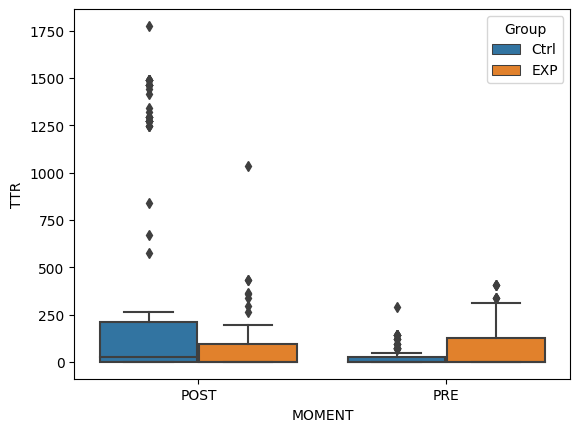

In [28]:
supportTasks['RTTC']=supportTasks['RTTC'].replace(" ",np.NaN)
supportTasks['RTTC']=pd.to_numeric(supportTasks['RTTC'])
supportTasksPost=supportTasks.loc[supportTasks['MOMENT']=='POST']
sns.boxplot(data=supportTasks, x='MOMENT',y='TTR',hue='Group')
figureFileName = 'figures/suportTasks-TTR-boxplot.png'
plt.savefig(figureFileName,bbox_inches='tight',dpi=300)
anovaTable=pg.anova(dv='TTR', between='Group', data=supportTasksPost[['TTR','Group','ID']].dropna())
print("ANOVA Mixed for TTR en support tasks:")
anovaTable

,Source,ddof1,ddof2,F,p-unc,np2
0,Group,1,325,1.16265,0.281716,0.003565


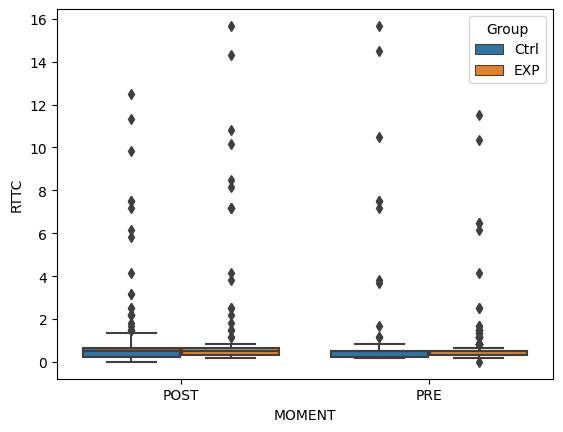

In [29]:
sns.boxplot(data=supportTasks, x='MOMENT',y='RTTC',hue='Group')
pg.anova(dv='RTTC', between=['Group'], data=supportTasksPost[['RTTC','Group','ID']].dropna())

In [30]:
pg.anova(dv='RTTC', between=['Group','MOMENT'], data=supportTasks[['RTTC','Group','MOMENT','ID']].dropna())

C:\Users\japarejo\anaconda3\envs\Inpro-Analysis\lib\site-packages\pingouin\utils.py:301: DeprecationWarning: NotImplemented should not be used in a boolean context
  x = list(filter(None.__ne__, x))
C:\Users\japarejo\anaconda3\envs\Inpro-Analysis\lib\site-packages\pingouin\utils.py:301: DeprecationWarning: NotImplemented should not be used in a boolean context
  x = list(filter(None.__ne__, x))
C:\Users\japarejo\anaconda3\envs\Inpro-Analysis\lib\site-packages\pingouin\utils.py:301: DeprecationWarning: NotImplemented should not be used in a boolean context
  x = list(filter(None.__ne__, x))
C:\Users\japarejo\anaconda3\envs\Inpro-Analysis\lib\site-packages\pingouin\utils.py:301: DeprecationWarning: NotImplemented should not be used in a boolean context
  x = list(filter(None.__ne__, x))


,Source,SS,DF,MS,F,p-unc,np2
0,Group,2.429052,1.0,2.429052,0.741846,0.389344,0.000982
1,MOMENT,20.049616,1.0,20.049616,6.123265,0.013560,0.008045
2,Group * MOMENT,2.704105,1.0,2.704105,0.825849,0.363766,0.001093
3,Residual,2472.122483,755.0,3.274334,NaN,NaN,NaN
